# Classification Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Creaye data
from sklearn.datasets import make_circles

# 1000 circles
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

## Function to visualise predictions of the model

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    # create x values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # make predictions
    y_pred = model.predict(x_in)
    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multi-class classification")
        # so, we re-shaping our pred for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Non-linear models

## Model 1

In [4]:
# Create a model
model_nl1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_nl1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history1 = model_nl1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 5.7053 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6665 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5842 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5232 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4650 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4486 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4352 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3944 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3763 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3722 - accuracy: 0.4780
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


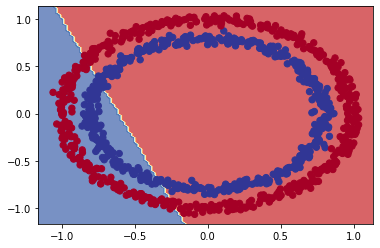

In [5]:
plot_decision_boundary(model_nl1, X, y)

## Model 2

In [6]:
# Create a model
model_nl2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_nl2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
model_nl2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.0490 - accuracy: 0.4640
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9411 - accuracy: 0.4620
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8956 - accuracy: 0.4280
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8654 - accuracy: 0.3890
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8441 - accuracy: 0.3760
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8281 - accuracy: 0.3930
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8155 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8040 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7938 - accuracy: 0.4210
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7855 - accuracy: 0.4340
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


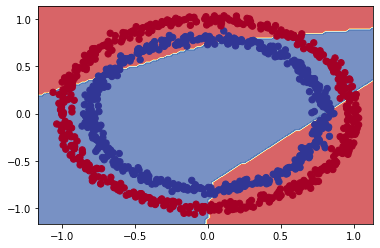

In [7]:
plot_decision_boundary(model_nl2, X, y)

## Model 3

In [8]:
# Create a model
model_nl3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history3 = model_nl3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5080
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5020
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5220
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5370
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5450
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5480
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5500
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5540
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5510
Epoch 11/

313/313 [==============================] - 1s 1ms/step
Doing binary classification


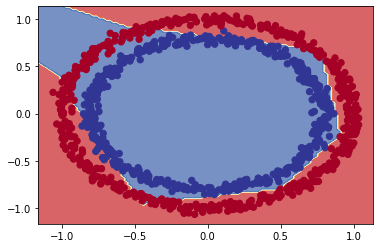

In [9]:
plot_decision_boundary(model_nl3, X, y)

## Model evaluation

In [10]:
# Mock tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

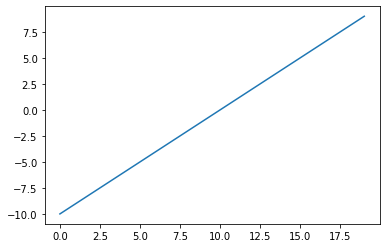

In [11]:
plt.plot(A)

In [12]:
# Replicating sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

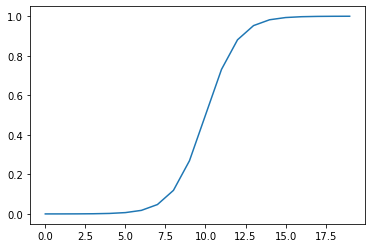

In [13]:
# Apply sigmoid to mock tensor and plot it
plt.plot(sigmoid(A))

In [14]:
# Replicating relu function
def relu(x):
    return tf.maximum(0, x)

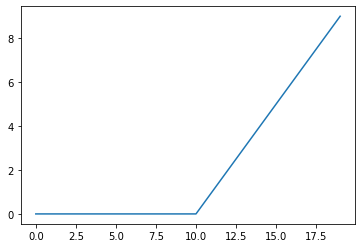

In [15]:
# Aply relu function to mock tensor and plot it
plt.plot(relu(A))

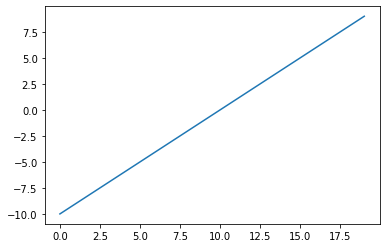

In [16]:
# Checking linear function
plt.plot(tf.keras.activations.linear(A))

In [17]:
# Does linear activation changes anything in tendor? No!
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Splitting dataset into training and testing parts

In [18]:
len(X)

1000

In [19]:
# 80/20 split
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [20]:
# Create a model
model_nl4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# Fit the model
history4 = model_nl4.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.4988
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5263
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5638
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6187
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5838
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6862
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7525
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7038
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.6862
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7812
Epoch 11/25
25/25 [

313/313 [==============================] - 1s 1ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


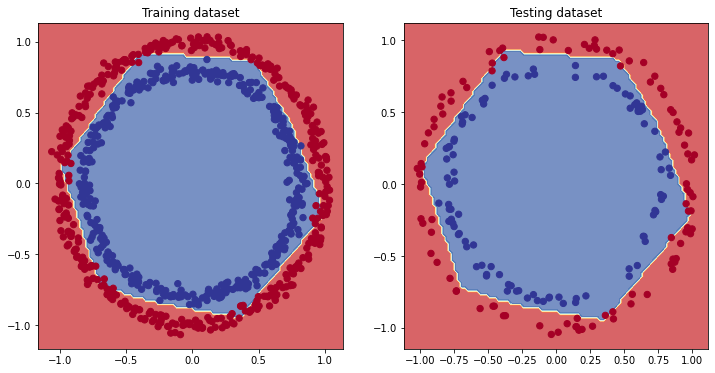

In [21]:
# Plot the decision boundaries for training and testing datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model=model_nl4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing dataset")
plot_decision_boundary(model_nl4, X_test, y_test)

## Plotting the loss curve

In [22]:
history4.history

{'loss': [0.6970691680908203,
  0.6895092129707336,
  0.6860373020172119,
  0.6821401715278625,
  0.6750612854957581,
  0.6663689613342285,
  0.6511454582214355,
  0.6255066394805908,
  0.5950316190719604,
  0.5391209125518799,
  0.49446922540664673,
  0.44091227650642395,
  0.40330055356025696,
  0.37295153737068176,
  0.35198837518692017,
  0.308104008436203,
  0.2783447802066803,
  0.24800118803977966,
  0.23314307630062103,
  0.2176051288843155,
  0.2008131742477417,
  0.2028152048587799,
  0.18094240128993988,
  0.16447409987449646,
  0.15062639117240906],
 'accuracy': [0.4987500011920929,
  0.5262500047683716,
  0.5637500286102295,
  0.6187499761581421,
  0.5837500095367432,
  0.6862499713897705,
  0.7524999976158142,
  0.7037500143051147,
  0.6862499713897705,
  0.78125,
  0.8187500238418579,
  0.8575000166893005,
  0.8737499713897705,
  0.8849999904632568,
  0.8974999785423279,
  0.9212499856948853,
  0.9524999856948853,
  0.9637500047683716,
  0.9612500071525574,
  0.962499976

In [23]:
import pandas as pd

loss_pd4 = pd.DataFrame(history4.history)
loss_pd4

,loss,accuracy
0,0.697069,0.49875
1,0.689509,0.52625
2,0.686037,0.56375
3,0.682140,0.61875
4,0.675061,0.58375
5,0.666369,0.68625
6,0.651145,0.75250
7,0.625507,0.70375
8,0.595032,0.68625
9,0.539121,0.78125


Text(0.5, 1.0, 'Loss curve')

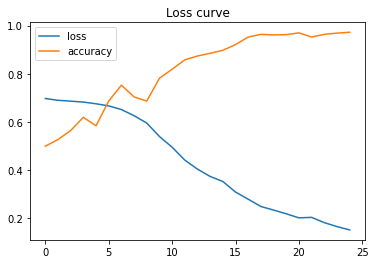

In [24]:
loss_pd4.plot()
plt.title("Loss curve")

## Finding the best learning rate

In [26]:
# Create a model
model_nl5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_nl5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Introduce a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

# Fit the model, along with the learning rate scheduler
history5 = model_nl5.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6919 - accuracy: 0.5138 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

In [28]:
loss_pd5 = pd.DataFrame(history5.history)
loss_pd5

,loss,accuracy,lr
0,0.691913,0.51375,0.000100
1,0.691878,0.49750,0.000112
2,0.691831,0.50125,0.000126
3,0.691796,0.50000,0.000141
4,0.691739,0.50000,0.000158
...,...,...,...
95,0.951706,0.51625,5.623413
96,0.787491,0.53125,6.309574
97,0.786704,0.48375,7.079458
98,0.729326,0.51125,7.943282


<AxesSubplot:xlabel='epochs'>

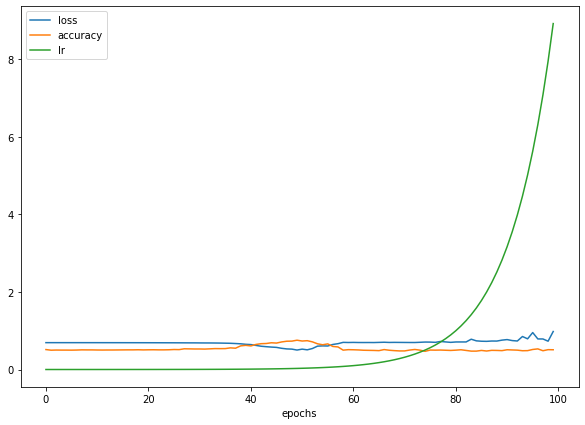

In [30]:
loss_pd5.plot(figsize=(10, 7), xlabel="epochs")

In [31]:
# Learning rate values
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs Loss')

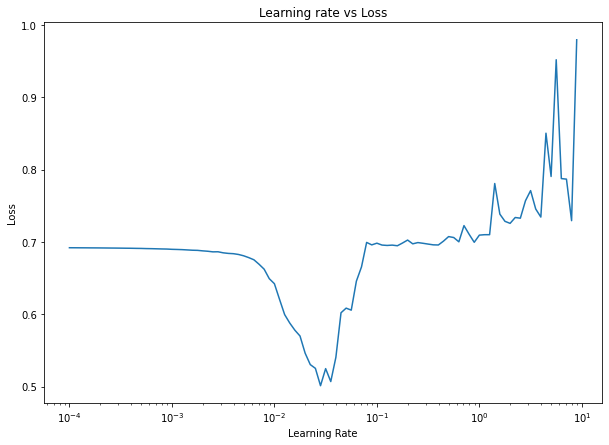

In [32]:
# Plot the learning rate vs loss
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history5.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")